In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

In [13]:
df.head(10)

,x,y,color
0,2.375386,-2.151675,red
1,0.155175,-3.939919,blue
2,0.580631,-2.425793,blue
3,2.045291,-2.755232,red
4,0.637783,-1.396165,blue
5,-1.802984,-2.106357,red
6,-2.658070,-4.090562,blue
7,3.574293,3.096076,red
8,-1.457052,1.785469,blue
9,3.577787,-1.694715,red


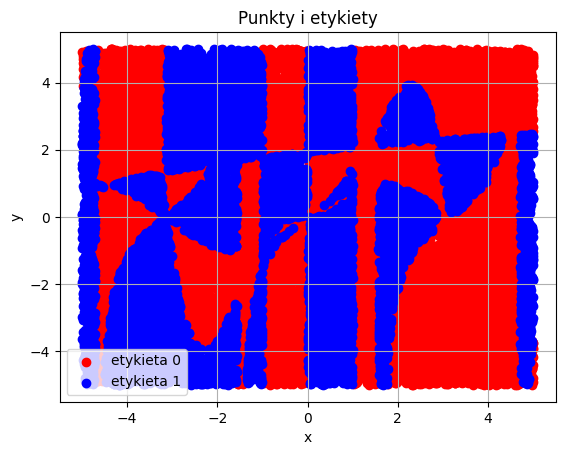

In [15]:
import matplotlib.pyplot as plt
df['color_coded'] = df.loc[:,'color'].apply(lambda x: 0 if x == 'red' else 1)

# czerwone punkty
plt.scatter(df[df['color_coded'] == 0]['x'], df[df['color_coded'] == 0]['y'], color='red', label='etykieta 0')
# niebieskie punkty
plt.scatter(df[df['color_coded'] == 1]['x'], df[df['color_coded'] == 1]['y'], color='blue', label='etykieta 1')

# osie, tytuł i legenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Punkty i etykiety')
plt.legend()

# linie siatki i wyświetlenie rysunku
plt.grid(True)
plt.show()

In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# wyodrębnienie cech i etykiet
X = df[['x', 'y']]
y = df['color_coded']

# podział na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.5905 - accuracy: 0.6661
Epoch 2/100
500/500 [==============================] - 1s 1ms/step - loss: 0.5248 - accuracy: 0.7490
Epoch 3/100
500/500 [==============================] - 1s 1ms/step - loss: 0.4865 - accuracy: 0.7826
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 0.4575 - accuracy: 0.7924
Epoch 5/100
500/500 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.8013
Epoch 6/100
500/500 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8065
Epoch 7/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3932 - accuracy: 0.8170
Epoch 8/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3652 - accuracy: 0.8323
Epoch 9/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3463 - accuracy: 0.8408
Epoch 10/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3256 - accura

In [33]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Dokładność modelu: {acc:.2%}')

Dokładność modelu: 95.65%


In [34]:
def plot_decision_boundary(model, X, y):
    
    # wartości minimalna i maksymalna odpowiednio dla x oraz dla y
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    
    # siatka punktów w odstępach co h
    h = 0.1
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # predykcje modelu dla poszczególnych punktów w siatce
    Z = model(np.c_[x_grid.ravel(), y_grid.ravel()])
    Z = Z.numpy()[:, 0].reshape(x_grid.shape)
    
    # wykres
    plt.contourf(x_grid, y_grid, Z, cmap='Spectral')
    plt.show()

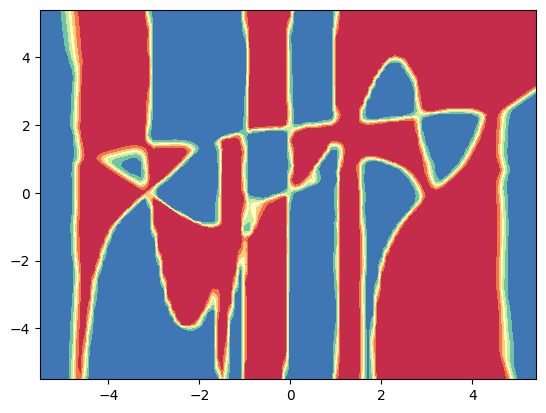

In [35]:
plot_decision_boundary(model, X_train.values, y_train.values)

In [36]:
data_test = pd.read_csv('test.csv')

In [37]:
data_test.head()

,x,y,color
0,-2.451839,-3.967665,blue
1,-4.077216,1.063597,blue
2,1.718660,-4.612983,blue
3,-2.187174,-4.731947,blue
4,-3.695086,1.364596,red


In [38]:
data_test['color_coded'] = data_test.loc[:,'color'].apply(lambda x: 0 if x == 'red' else 1)

In [39]:
x_t = data_test.loc[:,['x','y']]
y_t = data_test.loc[:,'color_coded']

In [40]:
loss, acc = model.evaluate(x_t, y_t, verbose=0)
print(f'Dokładność modelu: {acc:.2%}')

Dokładność modelu: 95.86%


In [ ]:
#################################### WINE #########################################

In [42]:
from sklearn.preprocessing import StandardScaler
data_wine = pd.read_csv('wine.csv')

In [43]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [45]:
klasy = data_wine['quality'].unique()
print('Różne wartości w kolumnie quality:', klasy)

liczba_klas = data_wine['quality'].nunique()
print('Liczba różnych klas w kolumnie quality:', liczba_klas)
data_wine['quality'] = data_wine['quality'].apply(lambda x: x - 3)
data_wine.quality.unique()

Różne wartości w kolumnie quality: [5 6 7 4 8 3]
Liczba różnych klas w kolumnie quality: 6


array([2, 3, 4, 1, 5, 0], dtype=int64)

In [59]:
X = data_wine.drop(columns=['quality'])
y = data_wine['quality']

# dzielimy na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standaryzujemy cechy
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(liczba_klas, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                416       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 6)                 102       
                                                                 
Total params: 1,046
Trainable params: 1,046
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_norm, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 1.8425 - accuracy: 0.3119 - val_loss: 1.8282 - val_accuracy: 0.3224
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.6847 - accuracy: 0.3899 - val_loss: 1.7006 - val_accuracy: 0.3770
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1.5721 - accuracy: 0.4118 - val_loss: 1.5961 - val_accuracy: 0.3770
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 1.4588 - accuracy: 0.4145 - val_loss: 1.4864 - val_accuracy: 0.3770
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1.3350 - accuracy: 0.4309 - val_loss: 1.3572 - val_accuracy: 0.4317
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.5198 - val_loss: 1.2413 - val_accuracy: 0.4481
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 1.1142 - accuracy: 0.5458 - val_loss: 1.1661 - val_accuracy: 0.4973
Epoch 8/50
23/23 [=

In [62]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Dokładność modelu: {acc:.2%}')

Dokładność modelu: 41.48%


In [ ]:
############################ HEART DISEASE #############################################

In [65]:
!pip install ucimlrepo

In [124]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 


In [125]:
y.loc[:,'num_category'] = y.loc[:,'num'].apply(lambda x: 0 if x == 0 else 1)
y_d = y.loc[:,'num_category']
X_train, X_test, y_train, y_test = train_test_split(X, y_d, test_size=0.3, random_state=42, stratify=y_d)

# standaryzujemy cechy
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

C:\Users\student\AppData\Local\Temp\ipykernel_15640\224927147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:,'num_category'] = y.loc[:,'num'].apply(lambda x: 0 if x == 0 else 1)


In [126]:
X_train_norm.shape[1]

13

In [127]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 5.8351 - accuracy: 0.5047
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4575
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4575
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4575
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5519
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5425
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5425
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5425
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5425
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5425
Epoch 11/50
7/7 [======================

In [128]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Dokładność modelu: {acc:.2%}')

Dokładność modelu: 53.85%


In [ ]:
########################################### IRIS DATA ##########################################

In [133]:
import sklearn as sk
from sklearn.datasets import load_iris

In [137]:
data = load_iris(as_frame= True)

In [155]:
X = data.data
y = data.target

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

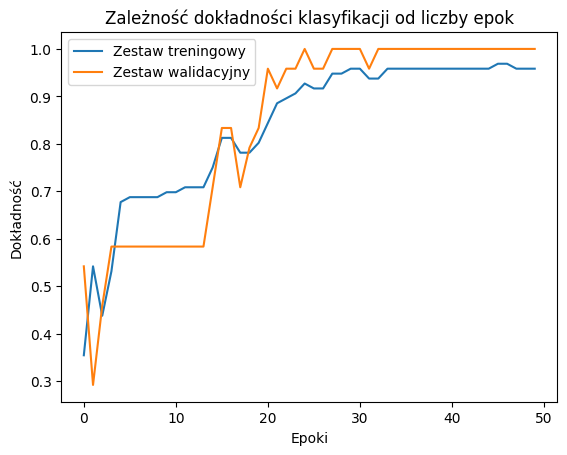

In [162]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

plt.plot(history.history['accuracy'], label='Zestaw treningowy')
plt.plot(history.history['val_accuracy'], label='Zestaw walidacyjny')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.title('Zależność dokładności klasyfikacji od liczby epok')
plt.legend()
plt.show()